### Let's Talk About prediction of BANK CUSTOMER CHURNING 
#### The aim of This Project is to Predict the exits of customers from a bank.This is definitely a classification problem because there are two outcomes(Exit and Non-exit).And from our dataset,our target variable is Exited.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
current_directory=os.getcwd()
print(current_directory)

C:\Users\DAMMY\Desktop\datascience\Datasets-Youtube-Pandas-main\DS


##### As usual,Let's start with data wrangling(cleaning and preprocessing) so we can have the best prepared dataset to work it.The steps include:
##### 1.Read data with and let pandas show the head
##### 2.Find the shape(Rows and Columns),info,check for nullvalues,describe values and if possible drop some unnecessary columns of our dataset..In that order.

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape


(10000, 14)

In [6]:
print('The number of rows is',df.shape[0])
print('The number of columns  is',df.shape[1])

The number of rows is 10000
The number of columns  is 14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##### As part of our data cleaning and preparation,we will need to drop some less important columns to make our dataset lighter

In [12]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Now from our data set we can see that geography is a categorical column because there are more than one unique value there.For us to perform Machine learning model,we will have to convert categorical to numerical and we will use pd.get_dummies instead of mapping because there are more than two variables.THIS IS CALLED CATEGORICAL DATA ENCODING.In pd.get_dummies,we will need to avoid demi-variable trap a phenomenom whereby the independent variables are highly correlated.In simple term,one variable can be predicted from others.

In [13]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0,0


##### Again,It is important to know that our Target variable in relation to churning is exited as stated earlier.So we wil need to work on the column

In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

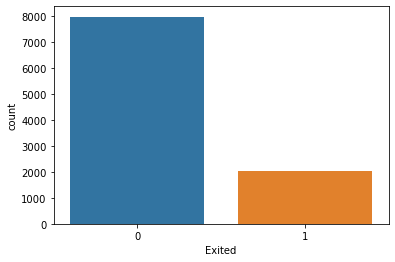

In [17]:
sns.countplot(df['Exited'])

##### From our visualization,we can see that our target variable is an imbalanced data.What is an imbalanced data?they are datasets where the target variable(column) has an uneven distribution of observations.One class is higher than the other

##### Let's first separate independent variables from dependent variables

In [18]:
X=df.drop('Exited',axis=1)
y=df['Exited']

#### Handling imbalanced Data with SMOTE

##### We can use two methods,Oversampling and Undersampling.In undersampling ,we can loose a lot of valuable data so we oversample with SMOTE.SMOTE means synthetic minority oversampling technique.It is used to balance class distribution by randomly increasing minority class examples by replacing them.The advantage of smote is that you are not generating duplicates but rather creating synthetic data points slightly different from the original data points. Summarily,we will make even distribution between majority and minority classes


In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
X_smo,y_smo = SMOTE().fit_resample(X,y)

In [21]:
y_smo.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

#### Train,Test,Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_smo,y_smo,test_size=0.2,random_state=42)

#### Feature Scaling:
##### We use it mainly for classification and regression models like Knneighbors,linear and logistic regressions,neural links.While Non linear problems dont require feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [27]:
X_train

array([[-0.77805581,  1.32071612, -0.66944999, ..., -0.56925307,
        -0.46087915, -0.84115748],
       [ 1.08946741,  0.11066056, -1.40608783, ..., -0.56925307,
        -0.46087915,  1.18883803],
       [ 1.27512762, -0.69604314,  0.43550677, ..., -0.56925307,
        -0.46087915, -0.84115748],
       ...,
       [ 0.19392996,  0.21149852,  1.1721446 , ..., -0.56925307,
        -0.46087915,  1.18883803],
       [ 0.5324868 ,  0.71568834,  0.80382568, ..., -0.56925307,
        -0.46087915, -0.84115748],
       [ 0.52156561,  1.01820223, -1.40608783, ...,  1.75668794,
        -0.46087915,  1.18883803]])

##### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred1=log.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred1)

0.7840552416823603

In [33]:
accuracy_score(y_test,y_pred1)

0.7840552416823603

##### Remember,it is very dangerous to use accuracy as a metrics on imbalanced data.We have to use precision_score,recall_score,f1_score

In [34]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [35]:
precision_score(y_test,y_pred1)


0.7708202880400752

In [36]:
recall_score(y_test,y_pred1)

0.7926593689632968

In [37]:
f1_score(y_test,y_pred1)

0.7815873015873016

##### Precision represents the model's ability to correctly predict the positives out of all the positive predictions. It's PC = TP/ (FP + TP)..PC is precision score,TP is True Positive,FP is false positive

##### Recall score is the model's ability to correctly predict the positives out of actual positives RC = TP / (TP + FN) Where FN is false negative

#### S V C :

In [38]:
from sklearn import svm

In [39]:
svm = svm.SVC()

In [40]:
svm.fit(X_train,y_train)

SVC()

In [41]:
y_pred2 = svm.predict(X_test)

In [42]:
accuracy_score (y_test,y_pred2)

0.839924670433145

In [43]:
precision_score (y_test,y_pred2)

0.8319541693189052

##### KNeighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred3 = knn.predict(X_test)

In [48]:
accuracy_score (y_test,y_pred3)

0.8217200251098556

In [49]:
precision_score (y_test,y_pred3)

0.8023327194597912

##### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4 = dt.predict(X_test)

In [54]:
accuracy_score (y_test,y_pred4)

0.7871939736346516

In [55]:
precision_score (y_test,y_pred4)

0.7643504531722054

##### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5 = rf.predict(X_test)

In [60]:
accuracy_score (y_test,y_pred5)

0.8650345260514752

In [61]:
precision_score (y_test,y_pred5)

0.8533668974197609

##### Gradient Boosting Classifier:

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gb = GradientBoostingClassifier()

In [64]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [65]:
y_pred6 = gb.predict(X_test)

In [66]:
accuracy_score (y_test,y_pred6)

0.8440050219711237

In [67]:
precision_score (y_test,y_pred6)

0.8375959079283888

##### After using various models to predict,we will create a series dataset so we can compare Accuracy and Precision scores of our models visually so we can save our best model based on the mentioned scores incase of future predictions.

In [68]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})

In [69]:
final_data

,Models,ACC
0,LR,0.784055
1,SVC,0.839925
2,KNN,0.821720
3,DT,0.787194
4,RF,0.865035
5,GBC,0.844005


C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

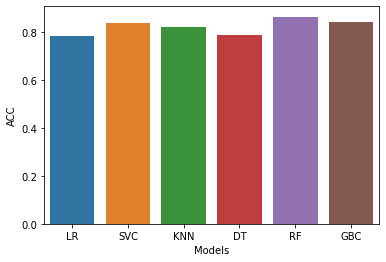

In [70]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [71]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'PRE':[precision_score(y_test,y_pred1),
                                  precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),
                                  precision_score(y_test,y_pred4),
                                  precision_score(y_test,y_pred5),
                                  precision_score(y_test,y_pred6)]})

In [72]:
final_data

,Models,PRE
0,LR,0.770820
1,SVC,0.831954
2,KNN,0.802333
3,DT,0.764350
4,RF,0.853367
5,GBC,0.837596


C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='PRE'>

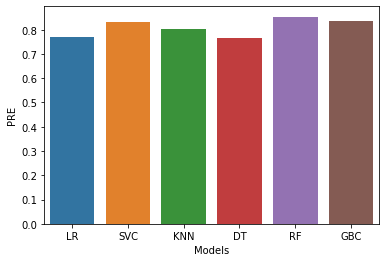

In [73]:
sns.barplot(final_data['Models'],final_data['PRE'])

#### Save The Model

##### Since Random Forest proves to be the highest from our precision_score and Accuracy_score,we will have to save our random forest model for future predictions


In [74]:
X_smo=sc.fit_transform(X_smo)

In [75]:
rf.fit(X_smo,y_smo)

RandomForestClassifier()

In [76]:
import joblib

In [77]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

##### Now, we have saved our model. To use this model,we will have to load using:

In [78]:
Themodel=joblib.load('churn_predict_model')

#### GUI:

In [79]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [80]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = float(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = float(e8.get())
    p9 = int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 ==2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 ==3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10 = int(e10.get())
    Themodel = joblib.load('churn_predict_model')
    result = Themodel.predict(sc.transform([[p1,p2,p3,p4,
                             p5,p6,
                             p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result ==0:
        Label(master,text="No Exit").grid(row=31)
    else:
        Label(master,text="Exit").grid(row=31)
master=Tk()
master.title("Customer Churn Prediction")

label = Label(master,text="Bank Customer Prediction System"
                         ,bg = "black",fg="white").\
                             grid(row=0,columnspan=2)


Label(master,text="Enter CreditScore").grid(row=1)
Label(master,text="Enter Age").grid(row=2)
Label(master,text="Enter Tenure").grid(row=3)
Label(master,text="Enter Balance").grid(row=4)
Label(master,text="Enter NumOfProducts").grid(row=5)
Label(master,text="Enter HasCrCard").grid(row=6)
Label(master,text="Enter Value of IsActiveMember").grid(row=7)
Label(master,text="Enter Value of EstimatedSalary").grid(row=8)
Label(master,text="Enter Value of Geography").grid(row=9)
Label(master,text="Enter Value of Gender").grid(row=10)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)

Button(master,text="Predict",command=show_entry_fields).grid()


mainloop()

    
    
    
    